In [212]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table,join
from astropy.table import Column
from astropy.io import fits
import astropy.units as u
from astropy.modeling import models, fitting

from astropy.visualization import astropy_mpl_style

plt.style.use(astropy_mpl_style)

In [195]:
Gaudin2023_M67 = Table.read('J_A+A_672_A159_tablec4.fits')
Gaudin2023_R147 = Table.read('J_A+A_644_A16_periods.fits')
GALAH_M67 = Table.read('M67_allstar_join.fits')
GALAH_R147 = Table.read('R147_allstar_join.fits')

GALAH_M67['gaiadr3_source_id'].name = 'GaiaDR3'
GALAH_R147['gaiadr3_source_id'].name = 'GaiaDR2'

GALAH_M67['Radius'] = np.sqrt(GALAH_M67['mass'] / 10**(GALAH_M67['logg'] -4.438)) #* u.solRad
GALAH_R147['Radius'] = np.sqrt(GALAH_R147['mass'] / 10**(GALAH_R147['logg'] -4.438)) #* u.solRad

GALAH_M67['vsini'] *= u.km/u.s
GALAH_R147['vsini'] *= u.km/u.s

Gaudin_GALAH_M67 = join(Gaudin2023_M67,GALAH_M67,keys = 'GaiaDR3')
Gaudin_GALAH_R147 = join(Gaudin2023_R147,GALAH_R147,keys = 'GaiaDR2')

## Radii

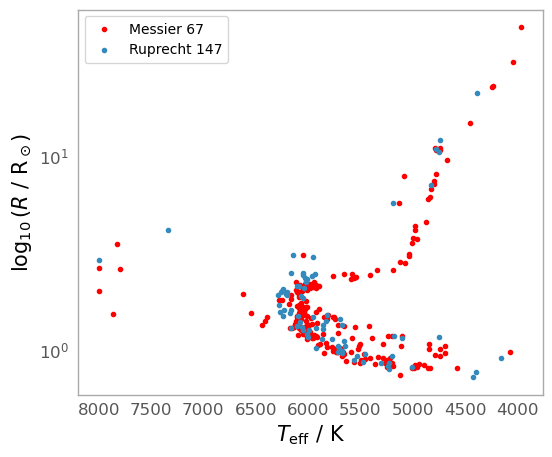

In [196]:
plt.figure(figsize = [6,5])
plt.scatter(GALAH_M67['teff'], GALAH_M67['Radius'], label='Messier 67', marker='.', color = 'r')
plt.scatter(GALAH_R147['teff'], GALAH_R147['Radius'], label='Ruprecht 147', marker='.')
plt.xlabel(r'$T_\mathrm{eff}~/~\mathrm{K}$', fontsize=15)
plt.ylabel(r'$\log_{10} \left( R~/~\mathrm{R_\odot}\right)$', fontsize=15)

plt.yscale('log')  # Set the y-axis to logarithmic scale
#plt.xlim(8200, 3800)
plt.xlim(plt.xlim()[::-1])
plt.legend(fontsize =10)  # Add legend if you have multiple scatter plots
plt.tight_layout
plt.grid(False)
plt.savefig('logR_vs_T.png', dpi=200, bbox_inches="tight")
plt.show()

## Periods

In [197]:
Gaudin_GALAH_M67['RotationalVelocity'] = ((2 * np.pi * Gaudin_GALAH_M67['Radius']*u.solRad) / (Gaudin_GALAH_M67['Per'])).to(u.km/u.s)
Gaudin_GALAH_R147['RotationalVelocity'] = ((2 * np.pi * Gaudin_GALAH_R147['Radius']*u.solRad) / (Gaudin_GALAH_R147['Per'])).to(u.km/u.s)

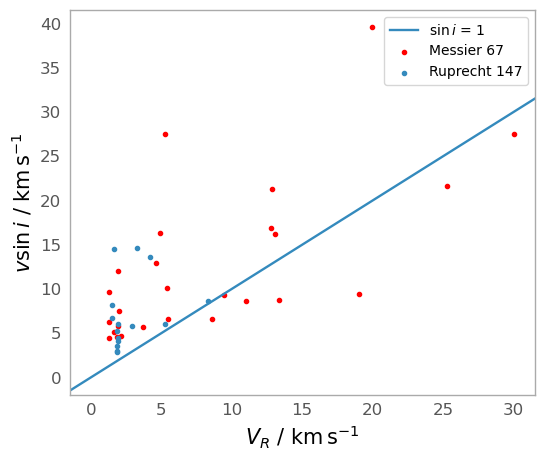

In [198]:
plt.figure(figsize = [6,5])
plt.axline((0,0),slope=1, label = r'$\sin i$ = 1')
plt.scatter(Gaudin_GALAH_M67['RotationalVelocity'].clip(max=30), Gaudin_GALAH_M67['vsini'], label='Messier 67', marker='.', color = 'r')
plt.scatter(Gaudin_GALAH_R147['RotationalVelocity'].clip(max=30), Gaudin_GALAH_R147['vsini'], label='Ruprecht 147', marker='.')

plt.ylabel(r'$v\sin{i} ~/~ \mathrm{km\,s^{-1}}$', fontsize=15)
plt.xlabel(r'$V_R ~/~ \mathrm{km\,s^{-1}}$', fontsize=15)

#plt.yscale('log')
plt.tight_layout
plt.legend(fontsize =10)
plt.grid(False)
plt.savefig('RV_vs_vsini.png', dpi=200, bbox_inches="tight")
plt.show()


In [222]:
Gaudin_GALAH_R147

EPIC,GaiaDR2,_2MASS,RAJ2000,DEJ2000,__BP-RP_0,__B-V_0,__B-V_calc,Gmag,e_Gmag,BPmag,e_BPmag,RPmag,e_RPmag,Bmag,e_Bmag,Vmag,e_Vmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Per,e_Per,Cat,Ncomp,Object,GyroSample,LC,FileName,Simbad,sobject_id,tmass_id,setup,ra,dec,flag_sp,flag_sp_fit,opt_loop,flag_red,snr_px_ccd1,snr_px_ccd2,snr_px_ccd3,snr_px_ccd4,chi2_sp,px_used_perc,fit_global_rv,rv_comp_1,e_rv_comp_1,rv_gaia_dr3,e_rv_gaia_dr3,teff,e_teff,logg,e_logg,fe_h,e_fe_h,flag_fe_h,vmic,e_vmic,vsini,e_vsini,mass,age,bc_ks,a_ks,lbol,r_med,r_lo,r_hi,sb2_rv_16,sb2_rv_50,sb2_rv_84,ew_h_beta,ew_h_alpha,res_h_beta,res_h_alpha,ew_k_is,sigma_k_is,rv_k_is,ew_dib5780,sigma_dib5780,rv_dib5780,ew_dib5797,sigma_dib5797,rv_dib5797,ew_dib6613,sigma_dib6613,rv_dib6613,ebv,phot_g_mean_mag,bp_rp,j_m,h_m,ks_m,W2mag,ruwe,parallax,parallax_error,Radius,RotationalVelocity,GALAH Binary
,,,deg,deg,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,d,d,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,km / s,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,mag,mag,mag,mag,mag,mag,,mas,mas,,km / s,
int32,int64,bytes17,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,uint8,int16,bytes3,bytes1,bytes2,bytes23,bytes6,int64,bytes17,bytes7,float64,float64,int32,int32,int32,int32,float32,float32,float32,float32,float32,int64,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,object
219238231,4087736159069458304,J19163672-1713101,289.153046,-17.219547,0.783,1.000,0.613,12.091,0.000,12.457,0.001,11.574,0.002,13.373,0.381,12.295,0.216,10.948,0.023,10.684,0.024,10.623,0.021,28.100,0.9,2,3,MS,N,LC,epic_219238231_hdu.fits,Simbad,170506006401014,19163672-1713101,allstar,289.1530456542969,-17.219499588012695,0,0,2,3072,76.77678,96.28067,111.004715,96.442276,0.88563704,94,True,42.597336,0.20650722,43.32316,0.7625697,5923.449,67.95505,4.448524,--,0.10993964,0.055378154,0,0.99840385,0.2841918,5.258534,1.5295174,1.0595173,2.2676172,1.4002098,0.003672014,1.1470374,304.57648,303.27585,305.90213,--,-150.0,--,0.055612147,0.2737114,0.8943207,1.3628712,--,--,--,0.07338738,0.7179574,-15.260433,--,--,--,0.014039654,0.114223145,30.353186,0.1443,12.083895,0.8712425,10.948,10.684,10.623,10.6,0.92533094,3.280397585049377,0.013866293,1.0169325,1.8309392,None
219275512,4087748833503644800,J19155912-1708032,288.996429,-17.134293,0.884,0.599,0.703,11.859,0.000,12.279,0.001,11.295,0.001,12.544,0.217,11.867,0.166,10.607,0.022,10.283,0.022,10.186,0.021,20.434,0.5,2,6,BIN,N,LC,epic_219275512_hdu.fits,Simbad,170506006401016,19155912-1708032,allstar,288.9963684082031,-17.13425064086914,0,0,2,3072,58.288006,72.260704,83.070724,74.5705,0.87384236,94,True,41.539967,0.238705,44.716736,1.4348831,5677.2163,69.58701,4.1830735,--,0.15717538,0.05735132,0,1.2222903,0.2835902,14.581996,1.4836335,0.98280525,10.620143,1.5321884,0.057833992,1.6543624,310.0175,307.68613,312.29922,--,--,--,0.07347019,0.32619163,0.8921692,1.3649375,0.018069701,0.17421456,-51.56232,0.057374064,0.6181854,-22.979092,0.025143858,0.5240666,-3.1228867,0.04541118,0.9324027,12.219667,0.1538,11.853657,0.9683647,10.607,10.283,10.186,10.14,1.2129107,3.2208787952861115,0.018818561,1.3295268,3.2917879,None
219306354,4087762371240557696,J19172705-1703472,289.362762,-17.063129,0.976,--,0.787,13.032,0.001,13.498,0.001,12.422,0.002,--,--,13.201,0.032,11.665,0.026,11.288,0.025,11.207,0.021,22.859,0.8,1,5,MS,Y,LC,epic_219306354_hdu.fits,Simbad,210801003001083,19172705-1703472,allstar,289.3627624511719,-17.06313705444336,2048,0,2,0,9.421236,15.634448,19.784393,1

In [226]:
conditionM67 = (Gaudin_GALAH_M67['vsini'] >= Gaudin_GALAH_M67['RotationalVelocity'])
M67_above = Gaudin_GALAH_M67[conditionM67]
M67_above[['sobject_id', 'binary']]

M67_above.show_in_notebook('sobject_id', 'binary')

idx,LC,Star,Sample,GaiaDR3,_2MASS,EPIC,Per,e_Per,Bmag,e_Bmag,Vmag,e_Vmag,Rmag,e_Rmag,Imag,e_Imag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Gmag,e_Gmag,BPmag,e_BPmag,RPmag,e_RPmag,M67,G-RP,G-RP0,e_G-RP,BP-RP,BP-RP0,e_BP-RP,B-V,B-V0,e_B-V,V-K,V-K0,e_V-K,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Plx,e_Plx,pmRA,e_pmRA,pmDE,e_pmDE,RV,e_RV,OType,SpType,binary,photbin,MS,HPS,DD,xstamp,ystamp,Kepler,K2sc,Everest,FileName,Simbad,_RA_icrs,_DE_icrs,sobject_id,tmass_id,setup,ra,dec,flag_sp,flag_sp_fit,opt_loop,flag_red,snr_px_ccd1,snr_px_ccd2,snr_px_ccd3,snr_px_ccd4,chi2_sp,px_used_perc,fit_global_rv,rv_comp_1,e_rv_comp_1,rv_gaia_dr3,e_rv_gaia_dr3,teff,e_teff,logg,e_logg,fe_h,e_fe_h,flag_fe_h,vmic,e_vmic,vsini,e_vsini,mass,age,bc_ks,a_ks,lbol,r_med,r_lo,r_hi,sb2_rv_16,sb2_rv_50,sb2_rv_84,ew_h_beta,ew_h_alpha,res_h_beta,res_h_alpha,ew_k_is,sigma_k_is,rv_k_is,ew_dib5780,sigma_dib5780,rv_dib5780,ew_dib5797,sigma_dib5797,rv_dib5797,ew_dib6613,sigma_dib6613,rv_dib6613,ebv,phot_g_mean_mag,bp_rp,j_m,h_m,ks_m,W2mag,ruwe,parallax,parallax_error,Radius,RotationalVelocity,GALAH binary,GALAHbinary,GALAHBin
,,,,,,,d,d,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,deg,arcsec,deg,arcsec,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,km / s,km / s,,,,,,,,pix,pix,,,,,,deg,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,km / s,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,mag,mag,mag,mag,mag,mag,,mas,mas,,km / s,,,
0,LC,10,Y,604897558972113024,J08512861+1138314,211400106,29.1387,2.5949,15.720,--,14.995,0.115,--,--,14.062,--,13.494,0.022,13.060,0.026,13.020,0.030,14.750,0.003,15.153,0.003,14.173,0.004,M,0.577,0.547,0.005,0.980,0.926,0.005,0.725,0.685,--,1.975,1.862,0.119,132.9,0.0235,11.6,0.0120,1.1734,0.0277,-11.142,0.030,-3.003,0.021,33.310,0.210,RotV*,G5V,N,,Y,N,N,218.110,361.110,Y,Y,N,0010.fits,Simbad,132.9,11.6,160107004101290,08512861+1138314,allstar,132.86920166015625,11.642083168029785,2048,0,2,32768,6.266279,11.015267,19.788618,18.957607,0.8241493,93,True,44.053997,0.2938098,22.060787,5.959841,5462.2837,97.5544,4.4418597,--,0.09648533,0.08274529,1,0.54170567,0.33098727,5.125774,1.7431154,0.90614027,8.083852,1.650992,0.0,0.7203229,817.63965,802.2797,834.7611,--,-130.0,--,0.059890784,0.26372004,0.8431927,1.2610428,0.08974744,0.29907057,-31.075289,0.042781387,0.16378209,47.310986,--,--,--,0.036905114,0.1423982,32.863445,0.0381,14.749684,0.9803457,13.494,13.06,13.018,13.002,0.99982774,1.217267427599597,0.027715387,0.9476936,1.6454545,1,None,None
1,LC,13,Y,604897833850019328,J08512386+1138521,211400500,24.3204,1.5564,15.170,--,14.554,0.105,--,--,13.713,0.002,13.313,0.022,12.952,0.024,12.942,0.029,14.371,0.003,14.710,0.003,13.865,0.004,M,0.506,0.476,0.005,0.846,0.792,0.005,0.616,0.576,--,1.612,1.499,0.109,132.8,0.0203,11.6,0.0102,1.1728,0.0236,-10.977,0.025,-2.843,0.018,34.611,0.352,RotV*,G2V,N,,Y,N,N,200.456,356.418,Y,Y,N,0013.fits,Simbad,132.8,11.6,160107004101288,08512386+1138521,allstar,132.84945678710938,11.647805213928223,2050,8,2,32768,3.9436305,8.426078,16.370268,--,0.85961515,93,True,34.31047,0.6230585,28.391434,5.926735,5710.7817,154.36049,4.4677024,--,0.10176496,0.11255963,1,0.6109412,0.4031126,7.4603,1.7391809,0.9937498,3.4997892,1.5138305,0.0,0.8893071,823.55396,808.24945,838.94604,--,--,--,-0.12083203,0.1426178,0.6878481,1.1820344,--,--,--,--,--,--,--,--,--,0.032974634,0.17578067,25.872595,0.0374,14.370622,0.8454981,13.313,12.952,12.942,12.917,0.94731593,1.2168173549575383,0.023582172,0.9633574,2.0040329,1,None,None
2,LC,17,N,604898456621037824,J08513257+1142051,--,29.8003,2.3224,15.420,--,14.620,0.105,--,--,--,--,13.143,0.022,12.737,0.023,12.674,0.025,14.371,0.003,14.778,0.003,13.800,0.004,M,0.570,0.540,0.005,0.978,0.924,0.005,0.800,0.760,--,1.946,1.833,0.108,132.9,0.0216,11.7,0.0102,1.1598,0.0257,-10.798,0.026,-3.023,0.018,33.680,0.230,SB*,G2V,Y,Y,Y,N,Y,231.246,306.987,N,N,N,0017.fits,Simbad,132.9,11.7,140111002601065,08513257+1142051,allstar,132.8857421875,11.701457977294922,92,0,2,0,30.319775,47.96526

In [200]:
conditionR147 = (Gaudin_GALAH_R147['vsini'] >= Gaudin_GALAH_R147['RotationalVelocity'])
R147_above = Gaudin_GALAH_R147[conditionR147]
R147_above[['sobject_id', 'Object']]


sobject_id,Object
int64,bytes3
170506006401014,MS
170506006401016,BIN
210801003001083,MS
170506006401388,MS
170506006401385,BIN
170828002201172,MS
170506006401240,MS
210801003001187,MS
210801003001174,MS


## Period and Colour

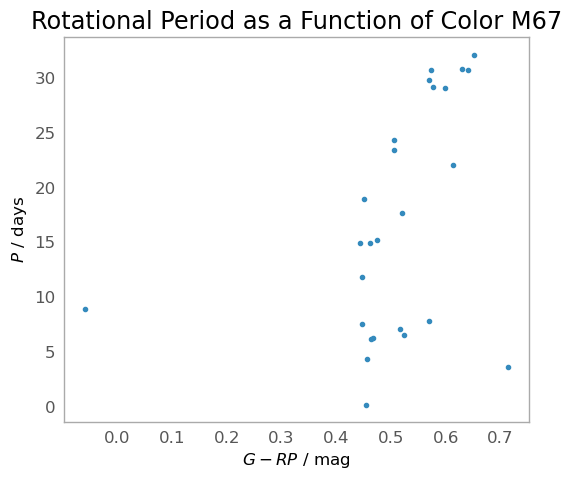

In [8]:
plt.figure(figsize = [6,5])
plt.scatter(Gaudin_GALAH_M67['G-RP'], Gaudin_GALAH_M67['Per'], marker='.')
plt.xlabel(r'$G-RP ~/~ \mathrm{mag}$')
plt.ylabel(r'$P~/~\mathrm{days}$')
plt.title('Rotational Period as a Function of Color M67')

plt.tight_layout
plt.grid(False)
plt.savefig('PvsColour_M67.png', dpi=200, bbox_inches="tight")
plt.show()

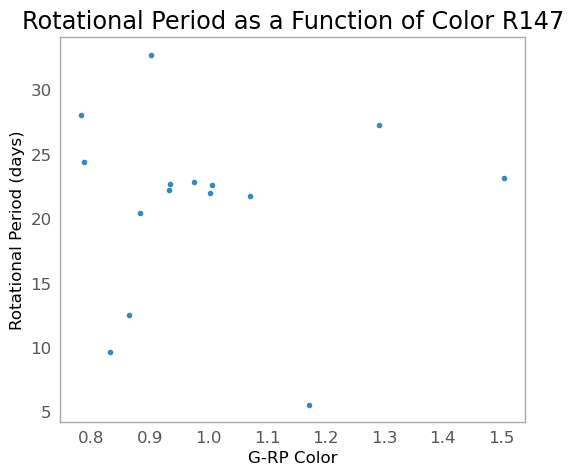

In [9]:
plt.figure(figsize = [6,5])
plt.scatter(Gaudin_GALAH_R147['__BP-RP_0'], Gaudin_GALAH_R147['Per'], marker='.')
plt.xlabel('G-RP Color')
plt.ylabel('Rotational Period (days)')
plt.title('Rotational Period as a Function of Color R147')

plt.tight_layout
plt.grid(False)
plt.savefig('PvsColour_R147.png', dpi=200, bbox_inches="tight")
plt.show()

In [21]:
Gaudin_GALAH_M67

LC,Star,Sample,GaiaDR3,_2MASS,EPIC,Per,e_Per,Bmag,e_Bmag,Vmag,e_Vmag,Rmag,e_Rmag,Imag,e_Imag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Gmag,e_Gmag,BPmag,e_BPmag,RPmag,e_RPmag,M67,G-RP,G-RP0,e_G-RP,BP-RP,BP-RP0,e_BP-RP,B-V,B-V0,e_B-V,V-K,V-K0,e_V-K,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Plx,e_Plx,pmRA,e_pmRA,pmDE,e_pmDE,RV,e_RV,OType,SpType,binary,photbin,MS,HPS,DD,xstamp,ystamp,Kepler,K2sc,Everest,FileName,Simbad,_RA_icrs,_DE_icrs,sobject_id,tmass_id,setup,ra,dec,flag_sp,flag_sp_fit,opt_loop,flag_red,snr_px_ccd1,snr_px_ccd2,snr_px_ccd3,snr_px_ccd4,chi2_sp,px_used_perc,fit_global_rv,rv_comp_1,e_rv_comp_1,rv_gaia_dr3,e_rv_gaia_dr3,teff,e_teff,logg,e_logg,fe_h,e_fe_h,flag_fe_h,vmic,e_vmic,vsini,e_vsini,mass,age,bc_ks,a_ks,lbol,r_med,r_lo,r_hi,sb2_rv_16,sb2_rv_50,sb2_rv_84,ew_h_beta,ew_h_alpha,res_h_beta,res_h_alpha,ew_k_is,sigma_k_is,rv_k_is,ew_dib5780,sigma_dib5780,rv_dib5780,ew_dib5797,sigma_dib5797,rv_dib5797,ew_dib6613,sigma_dib6613,rv_dib6613,ebv,phot_g_mean_mag,bp_rp,j_m,h_m,ks_m,W2mag,ruwe,parallax,parallax_error,Radius,RotationalVelocity
,,,,,,d,d,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,deg,arcsec,deg,arcsec,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,km / s,km / s,,,,,,,,pix,pix,,,,,,deg,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,mag,mag,mag,mag,mag,mag,,mas,mas,solRad,solRad
bytes2,int16,bytes1,int64,bytes17,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes13,bytes8,bytes1,bytes1,bytes1,bytes1,bytes1,float32,float32,bytes1,bytes1,bytes1,bytes9,bytes6,float64,float64,int64,bytes17,bytes7,float64,float64,int32,int32,int32,int32,float32,float32,float32,float32,float32,int64,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32
LC,10,Y,604897558972113024,J08512861+1138314,211400106,29.1387,2.5949,15.720,--,14.995,0.115,--,--,14.062,--,13.494,0.022,13.060,0.026,13.020,0.030,14.750,0.003,15.153,0.003,14.173,0.004,M,0.577,0.547,0.005,0.980,0.926,0.005,0.725,0.685,--,1.975,1.862,0.119,132.9,0.0235,11.6,0.0120,1.1734,0.0277,-11.142,0.030,-3.003,0.021,33.310,0.210,RotV*,G5V,N,,Y,N,N,218.110,361.110,Y,Y,N,0010.fits,Simbad,132.9,11.6,160107004101290,08512861+1138314,allstar,132.86920166015625,11.642083168029785,2048,0,2,32768,6.266279,11.015267,19.788618,18.957607,0.8241493,93,True,44.053997,0.2938098,22.060787,5.959841,5462.2837,97.5544,4.4418597,--,0.09648533,0.08274529,1,0.54170567,0.33098727,5.125774,1.7431154,0.90614027,8.083852,1.650992,0.0,0.7203229,817.63965,802.2797,834.7611,--,-130.0,--,0.059890784,0.26372004,0.8431927,1.2610428,0.08974744,0.29907057,-31.075289,0.042781387,0.16378209,47.310986,--,--,--,0.036905114,0.1423982,32.863445,0.0381,14.749684,0.9803457,13.494,13.06,13.018,13.002,0.99982774,1.217267427599597,0.027715387,0.9476936,0.20435141
LC,13,Y,604897833850019328,J08512386+1138521,211400500,24.3204,1.5564,15.170,--,14.554,0.105,--,--,13.713,0.002,13.313,0.022,12.952,0.024,12.942,0.029,14.371,0.003,14.710,0.003,13.865,0.004,M,0.506,0.476,0.005,0.846,0.792,0.005,0.616,0.576,--,1.612,1.499,0.109,132.8,0.0203,11.6,0.0102,1.1728,0.0236,-10.977,0.025,-2.843,0.018,34.611,0.352,RotV*,G2V,N,,Y,N,N,200.456,356.418,Y,Y,N,0013.fits,Simbad,132.8,11.6,160107004101288,08512386+1138521,allstar,132.84945678710938,11.647805213